In [40]:
# Checks:
!which python

/home/haruyaishikawa/anaconda3/envs/chainer/bin/python


In [41]:
# general
import cv2
import math
import time
import numpy as np
from pprint import pprint
import sys
from matplotlib import pyplot as plt

# chainer
import chainer

In [42]:
sys.path.insert(0, '../openpose')  # append path of openpose
sys.path.insert(0, '../openpose/data')  # append path of data

In [43]:
from pose_detector import PoseDetector, draw_person_pose
from entity import params, JointType

## Flow

In [44]:
# Chainer config
chainer.config.enable_backprop = False
chainer.config.train = False

chainer.config.show()

autotune              False
cudnn_deterministic   False
debug                 False
enable_backprop       False
keep_graph_on_report  False
lazy_grad_sum         False
train                 False
type_check            True
use_cudnn             auto
use_cudnn_tensor_core auto
use_ideep             never


In [45]:
# load model
# Defaults:
#    arch       : Need to be set
#    weight_file: Need to be set
#    device     : gpu=0
#    precise    : False

pose_detector = PoseDetector('posenet', '../openpose/models/coco_posenet.npz', device=0, precise=True)

print("success!")

Loading the model...
success!


In [46]:
# helper functions:

def show_rgb(img):
    '''OpenCV visualization in Jupyter Notebook'''
    # convert to rgb format
    rgb_img = img[:,:,::-1]
    %matplotlib notebook
    plt.imshow(rgb_img, interpolation='none')


height:  480 width:  640


<IPython.core.display.Javascript object>


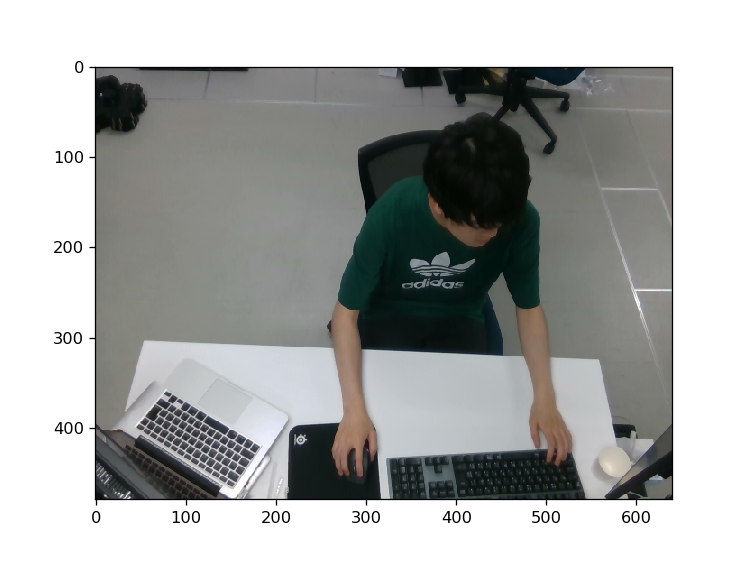

In [64]:
rgb_raw = "../../data/rgb/00400.png"
d_raw = "../../data/depth/00400.png"

# read image
img = cv2.imread(rgb_raw)

h, w = img.shape[:2]
print("height: ", h,"width: ", w)
    
show_rgb(img)
    
# inference
poses, scores = pose_detector(img)

In [48]:
pprint(poses)

array([[[293.,   0.,   2.],
        [287.,   0.,   2.],
        [231.,   9.,   2.],
        [220., 113.,   2.],
        [230., 190.,   2.],
        [340.,   0.,   2.],
        [350.,  75.,   2.],
        [372., 147.,   2.],
        [264., 155.,   2.],
        [305., 238.,   2.],
        [305., 321.,   2.],
        [325., 134.,   2.],
        [368., 215.,   2.],
        [398., 306.,   2.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]]])


<IPython.core.display.Javascript object>


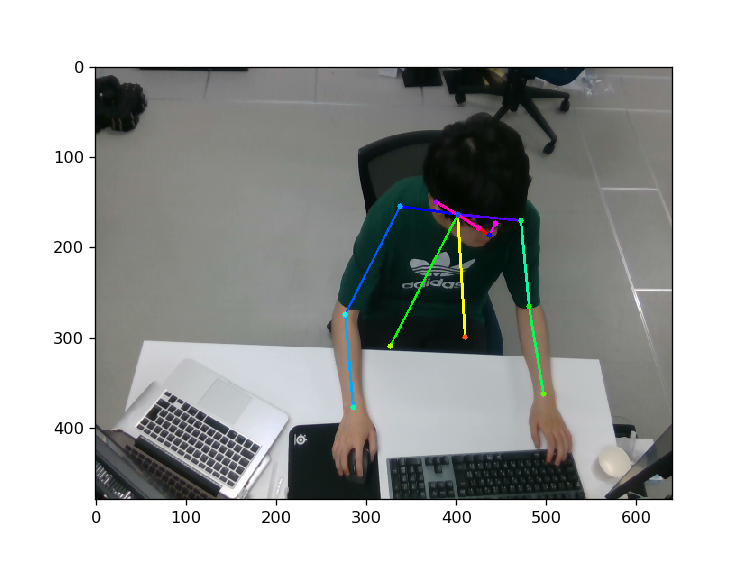

In [65]:
# draw and connect the joints in pose
img = draw_person_pose(img, poses)
show_rgb(img)

In [66]:
# JointType
for i, joint in enumerate(JointType):
    print(i, joint.name)

0 Nose
1 Neck
2 RightShoulder
3 RightElbow
4 RightHand
5 LeftShoulder
6 LeftElbow
7 LeftHand
8 RightWaist
9 RightKnee
10 RightFoot
11 LeftWaist
12 LeftKnee
13 LeftFoot
14 RightEye
15 LeftEye
16 RightEar
17 LeftEar


In [67]:
# analysis:
pose = poses[0]
print(len(JointType))

# how to get particular joints location
# output is an array: [x, y, score] 
# x, y are pixel locations

# example:
pose[JointType.Nose]
JointType(0).name

18


'Nose'

#TODO: what should the joint data be for storage?

1. save the array by itself
    - all images that I'll use is VGA formats
    - 

2.

In [52]:
import open3d as o3

In [68]:
# dataset

color = o3.read_image(rgb_raw)
depth = o3.read_image(d_raw)

In [69]:
d_img = np.asarray(depth)
print(d_img[320][320])
print(d_img.dtype)
print(d_img.shape)

1508
uint16
(480, 640)


In [70]:
rgbd_image = o3.create_rgbd_image_from_color_and_depth(color, depth)
print(rgbd_image)

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


In [71]:
pcd = o3.create_point_cloud_from_rgbd_image(rgbd_image, o3.PinholeCameraIntrinsic(
    o3.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# %matplotlib inline
#o3.draw_geometries([pcd])
arr = np.asarray(pcd.points)

In [72]:
arr.shape

(238038, 3)

<IPython.core.display.Javascript object>


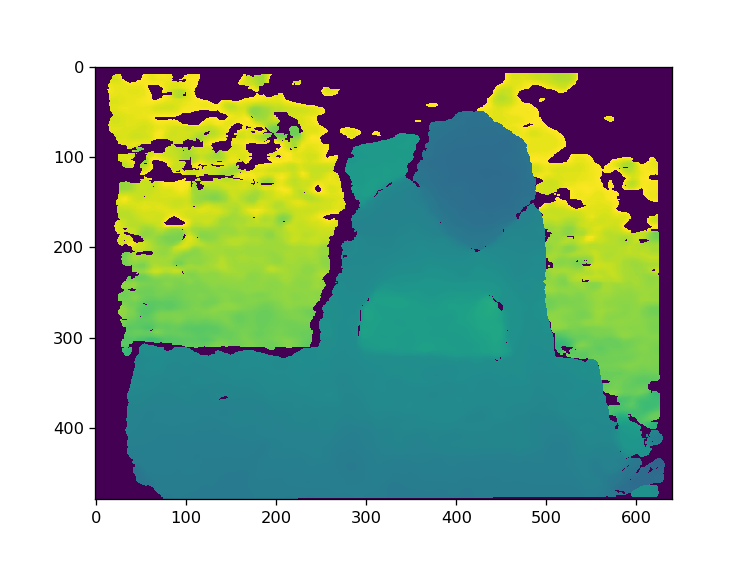

In [73]:
%matplotlib notebook
plt.imshow(rgbd_image.depth)

In [59]:
neck = pose[JointType.RightShoulder]
print(neck)
neck.dtype

[231.   9.   2.]


dtype('float64')

In [74]:
x = int(neck[0])
y = int(neck[1])

type(rgbd_image.depth)

open3d.Image

In [75]:
d = rgbd_image.depth

d1 = np.array(d)
print(d1[y][x])
d_img[y][x]

0.0


0

<IPython.core.display.Javascript object>


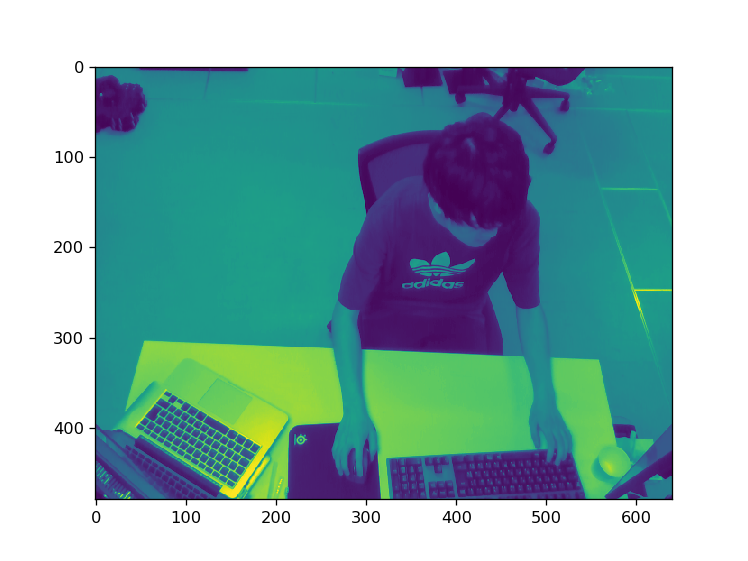

In [76]:
rgb = rgbd_image.color

rgb1 = np.array(rgb)

%matplotlib notebook
plt.imshow(rgbd_image.color)